**MISSING: \
1.3.1 missing some guessimations!\
1.4. missing input to output phase corr, since question is asking for phase shift not just phase**

all methods: https://lcn-neurodynex-exercises.readthedocs.io/en/latest/genindex.html

# Leaky-integrate-and-fire model
### using neurodynex: LIF
- ```leaky_integrate_and_fire.LIF``` implements a parametrizable LIF model

In [31]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

In [32]:
LIF.print_default_parameters()

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


nr of spikes: 0


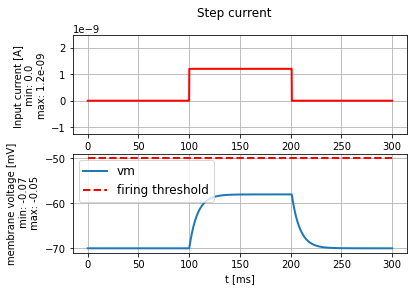

nr of spikes: 5


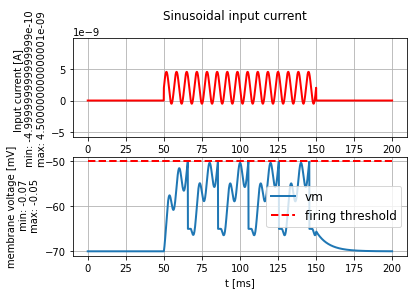

In [33]:
LIF.getting_started()

### changing neuron parameters
- you can change all parameters of LIF neuron using named parameters of the function : ```simulate_LIF_neuron()``` ; default values if non specified are:

V_REST = -70*b2*mV \
v_RESET = -65*b2*mV \
FIRING_THRESHOLD = -50*b2.mV \
MEMBRANE_RESISTANCE = 10. * b2.Mohm \
MEMBRANE_TIME_SCALE = 8. * b2.ms\
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

# Exercises
## 1.1 Exercise: minimal current
LIF neuron: 
- if no input current, its membrane voltage is constant = V_REST
- if input current sufficient to have vm above firing threshold, spike generated
    - vm then reset to vm = V_RESET and there is a refractory period during which the neuron can't fire again
    
### 1.1.1. Qustion: minimal current (computation)
- minimal amplitude I_min of a step current sufficient to elicit a spike. 
- we know V = RI so I = V/R (Ohm's Law)

In [20]:
print(" firing threshold - resting potential  = {} V \n membrane resistance = {} Ohm\n"\
      .format(LIF.FIRING_THRESHOLD - LIF.V_REST, LIF.MEMBRANE_RESISTANCE),\
     "necessary minimal current input = {} A \n"\
      .format((LIF.FIRING_THRESHOLD-LIF.V_REST)/LIF.MEMBRANE_RESISTANCE))

 firing threshold - resting potential  = 0.020000000000000004 V 
 membrane resistance = 10000000.0 Ohm
 necessary minimal current input = 2.0000000000000005e-09 A 



So you need a current input of around 2E-9 to reach threshold

### 1.1.2. Question: minimal current (simulation)
- inject step current of amplitude I_min for t = 100ms
- plot membrane voltage
- vm should approach firing threshold WITHOUT firing

nb spikes: 0


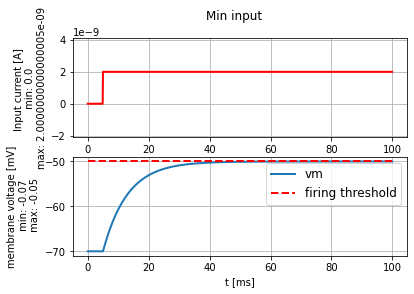

In [29]:
I_min = (LIF.FIRING_THRESHOLD-LIF.V_REST)/LIF.MEMBRANE_RESISTANCE

step_current = input_factory.get_step_current(t_start = 5,
                                              t_end = 1000,
                                              unit_time = b2.ms,
                                              amplitude = I_min)

(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current = step_current,
                                                         simulation_time = 100*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor,
                                           step_current,
                                           title = "Min input",
                                           firing_threshold = LIF.FIRING_THRESHOLD)

print("nb spikes: {}".format(spike_monitor.count[0]))

## 1.2. Exercise: f-I curve
- for a constant input current I, an LIF neuron fires regularly with firing frequency f.
- if the current is too small, f is null
- Firing rate vs. input amplitude =^ f_I curve

### 1.2.1. Question: f-I curve and refractoriness
- set refractory period  = 3ms
- plot f_I curve
- max firing rate?
- try input current in range \[0nA, 100nA\] and for each run simulation for t = 500ms
    - determine firing frequency and plot f_I curve
    - look closely at low input current :p

LIF neuron:

PARAMETERS
- input_current: TimedArray of current amplitudes. One column per current_injection_location
- simulation_time: time for which the dynamics are simulated
- v_rest: resting potential
- v_reset: reset voltage after spike
- firing threshold: self-explanatory
- membrane_resistance: ''
- membrane_time_scale : ''
- abs_refractory_period: ''

RETURNS:
- Brian2 StateMonitor for the membrane voltage “v” 
- SpikeMonitor: Brian2 SpikeMonitor

In [59]:
from brian2 import TimedArray, defaultclock

- not gonna sketch anything here but should expect:
    - for currents not strong enough to elicit spikes, nothing should happen
    - for currents that are strong enough, there should be a delay between spikes (abs_refractory period)
    - for increasingly large currents, the spiking frequency should increase as the memmbrane resistance remains the same --> higher voltages are attained 
    - at one point, there should be a maximum spiking frequency attained at which point the neuron will never spike faster than that even with higher input current

In [399]:
# the input current is CONSTANT so just make the step current start right at the beginning 
# and end after the simulation


I_range = np.linspace(0,100,11)*b2.nA

n_spikes = []

for I in I_range:
    step_current = input_factory.get_step_current(t_start = 5,
                                                  t_end = 1000,
                                                  unit_time = b2.ms,
                                                  amplitude = I)


    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current = step_current,
                                                             simulation_time = 500*b2.ms,
                                                             abs_refractory_period = 3*b2.ms)

    
    n_spikes.append(spike_monitor.count[0])
    

In [400]:
print("max nb of spikes: {} which occurs for a current: {} nA;\nThis means that since t=500ms we have a max spiking frequency of {} Hz"\
      .format(np.max(n_spikes), I_range[np.argmax(n_spikes)], np.max(n_spikes)/(500*b2.ms)))

max nb of spikes: 160 which occurs for a current: 7e-08 nA;
This means that since t=500ms we have a max spiking frequency of 320.0 Hz


In [401]:
freq = [n_spikes[i]/0.5 for i in range(len(n_spikes))]
print("The full range of frequencies are :\n{} Hz\nfor currents:\n{}".format(freq, I_range))

The full range of frequencies are :
[0.0, 230.0, 276.0, 292.0, 300.0, 310.0, 310.0, 320.0, 320.0, 320.0, 320.0] Hz
for currents:
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.] nA


In [402]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Firing frequencies of a LIF Neuron with refractory period 3ms')

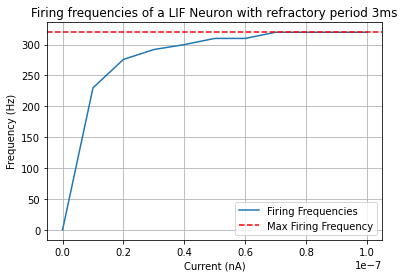

In [403]:
plt.plot(I_range, freq, label = "Firing Frequencies")
plt.grid(b=True, which='major', axis='both')
plt.xlabel("Current (nA)")
plt.ylabel("Frequency (Hz)")
plt.axhline(np.max(freq), ls='--', color='r', label = "Max Firing Frequency")
plt.legend(loc="best")
plt.title("Firing frequencies of a LIF Neuron with refractory period 3ms")

## 1.2. Exercise:"Experimentally" estimate the parameters of a lIF neuron
### 1.3.1 Question: "Read" the LIF parameters out of the ```vm``` plot

(<matplotlib.axes._subplots.AxesSubplot at 0x1ecf5552dc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ecf5da8488>)

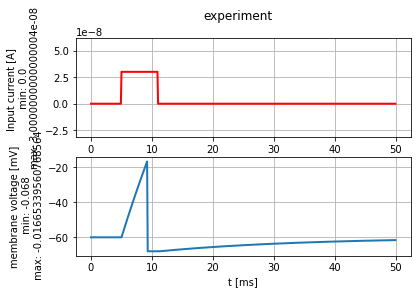

In [229]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
I = 30
test_current = input_factory.get_step_current(
    t_start=5, t_end=10, unit_time=b2.ms, amplitude= I * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

- for input current 30nA, peak voltage is approximately -20mV, reset voltage is -70 mV approximately, and the resting voltage is around -60mV

In [231]:
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


## 1.4. Exercise: Sinusoidal input current and subthreshold response
- in subthreshold regime, LIF neuron is in a linear system, membrane voltage is a filtered veresion of the input current!
### 1.4.1. Question:
- phase and amplitude of membrane voltage?

nb of spikes: 0


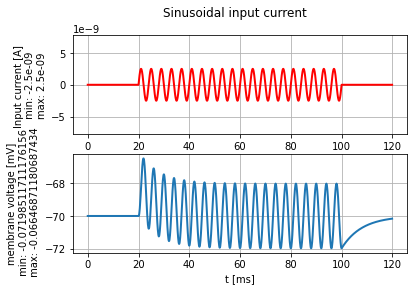

In [378]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nb of spikes: {}".format(spike_monitor.count[0]))

In [331]:
# leave some time for the amplitude to settle --> take second half of signals\
print("amplitude:", \
      np.max(state_monitor.v[0][int(len(state_monitor.v[0])/2):]) - np.min(state_monitor.v[0]))

amplitude: 3.98074176 mV


- We can guess that the period is inferior to 5ms and that there is a point in each "spike" that goes through a voltage contained within values of -70.2 and -69.8, form the plot and the length of recordings

In [390]:
indices = np.argwhere((state_monitor.v[0]>-70.2*b2.mV) & (state_monitor.v[0]<-69.8*b2.mV) \
           & (state_monitor.t > 60.0*b2.ms) & (state_monitor.t < 75.0*b2.ms))
print("Phase:", state_monitor.t[indices[1]][0] - state_monitor.t[indices[0]][0])

Phase: 2. ms


### 1.4.2. Question
- input freq between 10Hz, 1kHz: resulting amplitude of subthreshold oscillations of membrane potential?
- we are in subthreshold --> linear regime

In [394]:
amplitudes = []
phases = []
# take a log spacing between values:
range_freq = np.geomspace(10, 1000, 100)
for f in range_freq:

    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=f*b2.Hz,
                                            direct_current=0. * b2.namp)

    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current,
                                                             simulation_time = 120 * b2.ms,
                                                             firing_threshold=0*b2.mV)
    
    max_ = np.max(state_monitor.v[0][int(len(state_monitor.v[0])/2):]) 
    min_ = np.min(state_monitor.v[0][int(len(state_monitor.v[0])/2):])
    
    indices = np.argwhere((state_monitor.v[0]>-70.2*b2.mV) & (state_monitor.v[0]<-69.8*b2.mV) \
           & (state_monitor.t > 60.0*b2.ms))
    
    
    amplitudes.append(max_-min_)
    phases.append(state_monitor.t[indices[1]][0] - state_monitor.t[indices[0]][0])


Text(0.5, 1.0, 'Amplitude of subthreshold oscillations vs. input frequency')

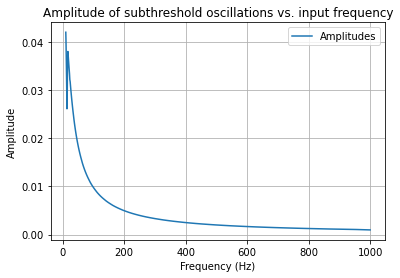

In [397]:
plt.plot(range_freq, amplitudes, label = "Amplitudes")
plt.grid(b=True, which='major', axis='both')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(loc="best")
plt.title("Amplitude of subthreshold oscillations vs. input frequency")

Text(0.5, 1.0, 'Phase of subthreshold oscillations vs. input frequency')

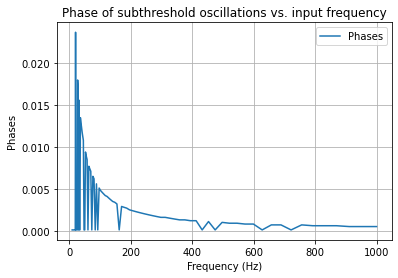

In [398]:
plt.plot(range_freq, phases, label = "Phases")
plt.grid(b=True, which='major', axis='both')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phases")
plt.legend(loc="best")
plt.title("Phase of subthreshold oscillations vs. input frequency")

### 1.4.4. Question
- that corresponds to a low pass filter: amplitude response tends to 0 with higher frequencies, and is max at lower frequencies --> lets low frequencies pass, cuts off high frequncies